In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
numberOfPrev=5

In [2]:
#Create a dataframe for the data from Tata Motors
df=pd.read_csv('TTM.csv')

In [3]:
# df.info()

In [4]:
#Filter the dataframe to retain only necessary columns
required_fields=['Date','Close']
df= df[required_fields]

In [5]:
#Change the type of 'Date' to datetime
df.Date=pd.to_datetime(df.Date)
df.tail

<bound method NDFrame.tail of            Date      Close
0    2004-09-27   9.150000
1    2004-09-28   8.760000
2    2004-09-29   8.750000
3    2004-09-30   8.970000
4    2004-10-01   9.250000
...         ...        ...
4569 2022-11-17  25.580000
4570 2022-11-18  25.690001
4571 2022-11-21  25.540001
4572 2022-11-22  25.940001
4573 2022-11-23  25.920000

[4574 rows x 2 columns]>

In [6]:
#Set Date as the index of dataframe
df=df.set_index(['Date'])
df

,Close
Date,
2004-09-27,9.150000
2004-09-28,8.760000
2004-09-29,8.750000
2004-09-30,8.970000
2004-10-01,9.250000
...,...
2022-11-17,25.580000
2022-11-18,25.690001
2022-11-21,25.540001


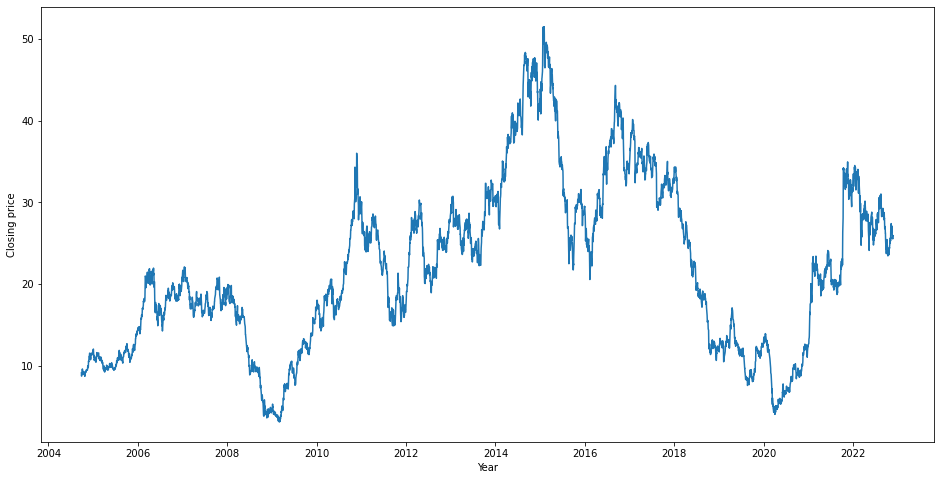

In [7]:
#A plot depicting the close values across years
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel("Closing price")
plt.show()

In [8]:
def format_dataframe(df1,n):
  close=list(df['Close'])
  df1=df[n::]
  df1=df1.T 
  for i in range(1,n+1):
    day="Day-"+str(i)
    df1.loc[day,:]=close[n-i:-i]

  return df1.T

In [9]:
df=format_dataframe(df,numberOfPrev)

In [10]:
df.head(25)

,Close,Day-1,Day-2,Day-3,Day-4,Day-5
Date,,,,,,
2004-10-04,9.47,9.25,8.97,8.75,8.76,9.15
2004-10-05,9.63,9.47,9.25,8.97,8.75,8.76
2004-10-06,9.45,9.63,9.47,9.25,8.97,8.75
2004-10-07,9.45,9.45,9.63,9.47,9.25,8.97
2004-10-08,9.40,9.45,9.45,9.63,9.47,9.25
2004-10-11,9.23,9.40,9.45,9.45,9.63,9.47
2004-10-12,9.00,9.23,9.40,9.45,9.45,9.63
2004-10-13,9.01,9.00,9.23,9.40,9.45,9.45
2004-10-14,9.04,9.01,9.00,9.23,9.40,9.45


In [11]:
def obtain_training_data(df1,n):
  dates=list(df.index)
  columnList=[]
  for i in range(1,n+1):
    day="Day-"+str(i)
    columnList.append(df[day])
    
  x=list(list(x) for x in columnList)
  X=np.array(x).T
  # X=x.reshape(len(dates),x.shape[1],1)
  y=list(df['Close'])
  return np.array(dates),X,np.array(y)

In [12]:
dates,input, output=obtain_training_data(df,numberOfPrev)
input.shape,output.shape,dates.shape

((4569, 5), (4569,), (4569,))

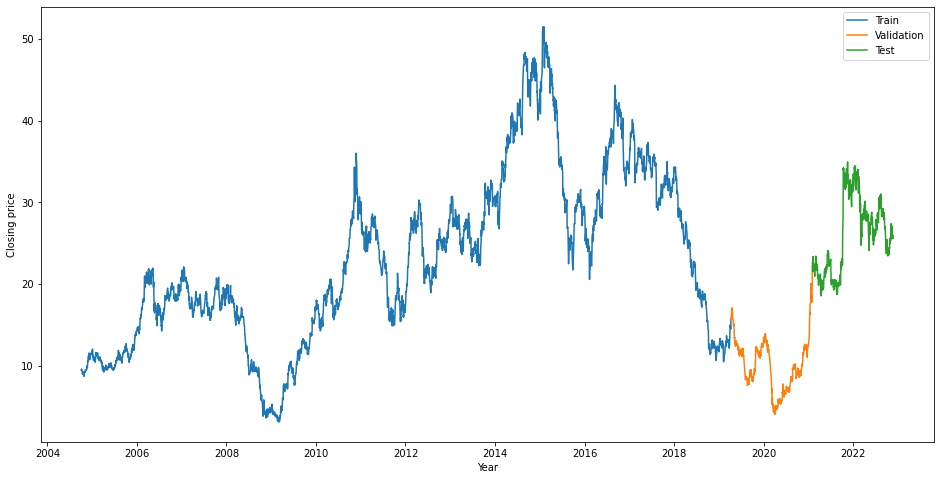

In [13]:
#Splits dates, inputs and actual outputs to train,validation and test sets (80%-10%-10%)
lenEightyPercent = int(len(dates) * .8)
lenNinetyPercent= int(len(dates) * .9)

inputTrain = input[ :lenEightyPercent]
outputTrain = output[ :lenEightyPercent]
datesTrain =dates[ :lenEightyPercent]

inputVal = input[lenEightyPercent : lenNinetyPercent]
outputVal = output[lenEightyPercent : lenNinetyPercent]
datesVal =dates[lenEightyPercent : lenNinetyPercent]

inputTest = input[lenNinetyPercent: ]
outputTest = output[lenNinetyPercent: ]
datesTest =dates[lenNinetyPercent: ]

plt.figure(figsize=(16,8))
plt.plot(datesTrain, outputTrain)
plt.plot(datesVal, outputVal)
plt.plot(datesTest, outputTest)
plt.xlabel('Year')
plt.ylabel("Closing price")
plt.legend(['Train', 'Validation', 'Test'])
plt.show()

In [14]:
from sklearn.linear_model import Lasso
lasso_model=Lasso(alpha=1.0)

In [15]:
lasso_model.fit(inputTrain,outputTrain)

Lasso()

In [16]:
predict_train=lasso_model.predict(inputTrain)
predict_val=lasso_model.predict(inputVal)
predict_test=lasso_model.predict(inputTest)

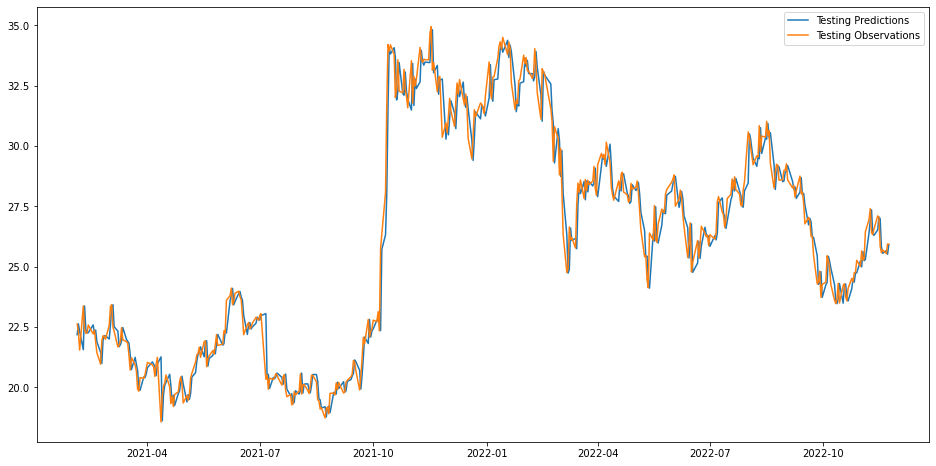

In [17]:
plt.figure(figsize=(16,8))
plt.plot(datesTest, predict_test)
plt.plot(datesTest, outputTest)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(outputTest,predict_test)
import math
from sklearn.metrics import mean_squared_error
k=math.sqrt(mean_squared_error(outputTest,predict_test))
print(k)

0.7366862465258494


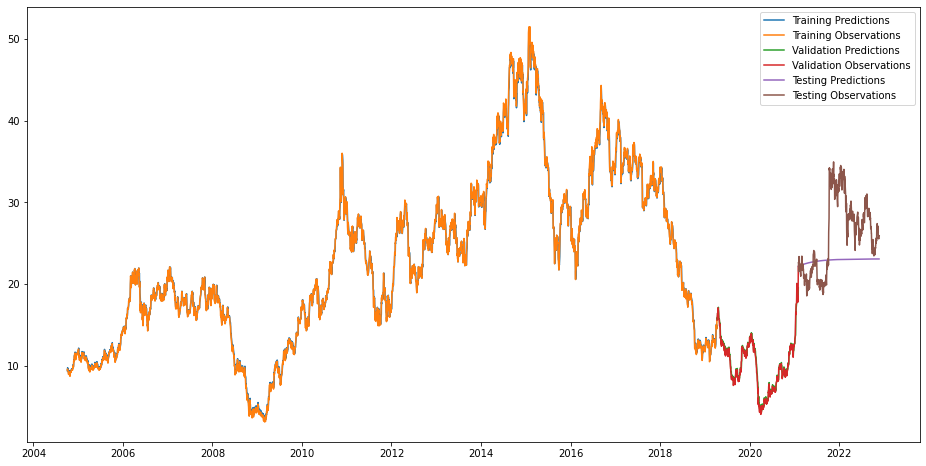

In [19]:
import copy
output_test_prediction=[]
output_test_prediction=np.array(output_test_prediction)
temp_array_test_input=[]
temp_array_test_input=np.array(temp_array_test_input)
for i in range(len(inputTest[0])):
  temp_array_test_input=np.append(temp_array_test_input,float(inputTest[0][i]))

temp_array_test_input1=np.flip(temp_array_test_input)
# print(temp_array_test_input1)

for i in range(len(inputTest)):
  ip=temp_array_test_input[0:numberOfPrev]
  # ip=np.flip(ip)
  ip=ip.reshape(1,numberOfPrev)
  res=lasso_model.predict(ip).flatten()
  output_test_prediction=np.append(output_test_prediction,res)
  temp_array_test_input=np.insert(temp_array_test_input,0,res)

plt.figure(figsize=(16,8))
plt.plot(datesTrain, predict_train)
plt.plot(datesTrain, outputTrain)
plt.plot(datesVal, predict_val)
plt.plot(datesVal, outputVal)
plt.plot(datesTest, output_test_prediction)
plt.plot(datesTest, outputTest)
# plt.legend(['Testing Predictions', 'Testing Observations'])
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])